In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df = pd.read_csv("C:/Users/ADMIN/Downloads/Data/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [170]:
# xem các giá trị trong từng cột
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [172]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [173]:
dummies = pd.get_dummies(df[["gender","race/ethnicity","parental level of education","lunch","test preparation course"]])
dummies= dummies.astype(int)
dummies

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [174]:
df = pd.concat([df,dummies],axis =1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_female,gender_male,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,female,group B,bachelor's degree,standard,none,72,72,74,1,0,...,0,1,0,0,0,0,0,1,0,1
1,female,group C,some college,standard,completed,69,90,88,1,0,...,0,0,0,0,1,0,0,1,1,0
2,female,group B,master's degree,standard,none,90,95,93,1,0,...,0,0,0,1,0,0,0,1,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,1,...,1,0,0,0,0,0,1,0,0,1
4,male,group C,some college,standard,none,76,78,75,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1,0,...,0,0,0,1,0,0,0,1,1,0
996,male,group C,high school,free/reduced,none,62,55,55,0,1,...,0,0,1,0,0,0,1,0,0,1
997,female,group C,high school,free/reduced,completed,59,71,65,1,0,...,0,0,1,0,0,0,1,0,1,0
998,female,group D,some college,standard,completed,68,78,77,1,0,...,0,0,0,0,1,0,0,1,1,0


# Loại bỏ các cột gốc khi ta đã mã hóa chúng

In [175]:
df = df.drop(columns = ["gender","race/ethnicity","parental level of education","lunch","test preparation course"])
df

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


# Loại bỏ một cột trong mỗi cột chúng ta đã mã hóa để tránh bẫy biến giả

In [176]:
df = df.drop(columns = ["gender_male","race/ethnicity_group E","parental level of education_some high school",
                        "lunch_standard","test preparation course_none"])
df

,math score,reading score,writing score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_free/reduced,test preparation course_completed
0,72,72,74,1,0,1,0,0,0,1,0,0,0,0,0
1,69,90,88,1,0,0,1,0,0,0,0,0,1,0,1
2,90,95,93,1,0,1,0,0,0,0,0,1,0,0,0
3,47,57,44,0,1,0,0,0,1,0,0,0,0,1,0
4,76,78,75,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,0,0,1,0,0,1
996,62,55,55,0,0,0,1,0,0,0,1,0,0,1,0
997,59,71,65,1,0,0,1,0,0,0,1,0,0,1,1
998,68,78,77,1,0,0,0,1,0,0,0,0,1,0,1


In [177]:
df["math score"].mean()

66.089

In [178]:
np.std(df["math score"])

15.155496659628165

# Công thức chuẩn hóa: z= (giá trị hiện tại - giá trị trung bình) / (độ lệch chuẩn)
 


In [179]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Chọn các cột cần chuẩn hóa
columns = ["math score", "reading score", "writing score"]


# Chuẩn hóa dữ liệu và gán lại cho DataFrame
df[columns] = scaler.fit_transform(df[columns])

# In DataFrame sau khi chuẩn hóa
df

,math score,reading score,writing score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_free/reduced,test preparation course_completed
0,0.390024,0.193999,0.391492,1,0,1,0,0,0,1,0,0,0,0,0
1,0.192076,1.427476,1.313269,1,0,0,1,0,0,0,0,0,1,0,1
2,1.577711,1.770109,1.642475,1,0,1,0,0,0,0,0,1,0,0,0
3,-1.259543,-0.833899,-1.583744,0,1,0,0,0,1,0,0,0,0,1,0
4,0.653954,0.605158,0.457333,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1,0,0,0,0,0,0,0,1,0,0,1
996,-0.269803,-0.970952,-0.859491,0,0,0,1,0,0,0,1,0,0,1,0
997,-0.467751,0.125472,-0.201079,1,0,0,1,0,0,0,1,0,0,1,1
998,0.126093,0.605158,0.589015,1,0,0,0,1,0,0,0,0,1,0,1


# Loại bỏ Outliner

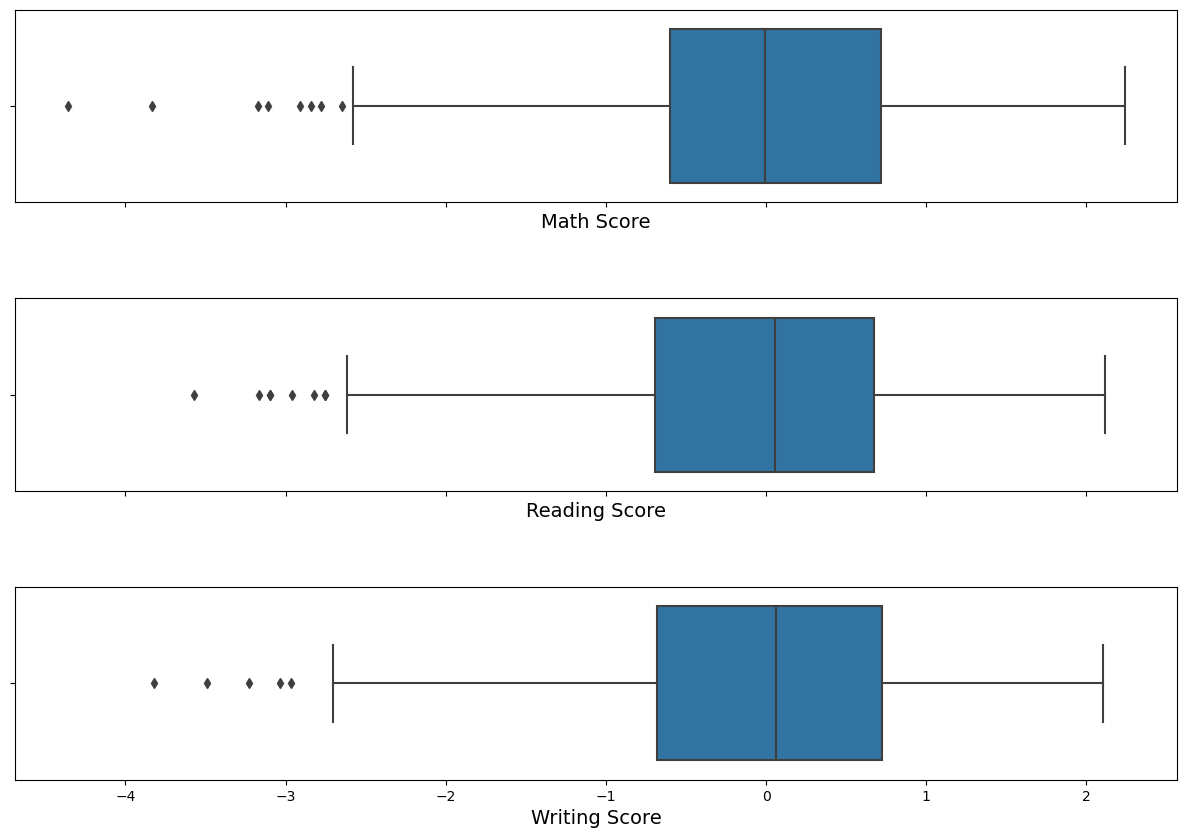

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo subplots với 3 dòng và 1 cột
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10), sharex=True, gridspec_kw={'hspace': 0.5})

# Vẽ boxplot cho từng cột và đặt tên cho mỗi biểu đồ
sns.boxplot(x=df["math score"], ax=axes[0])
axes[0].set_xlabel("Math Score", fontsize=14)  

sns.boxplot(x=df["reading score"], ax=axes[1])
axes[1].set_xlabel("Reading Score", fontsize=14)  

sns.boxplot(x=df["writing score"], ax=axes[2])
axes[2].set_xlabel("Writing Score", fontsize=14)  



plt.show()


In [181]:
from scipy.stats import zscore

# Chọn các cột cần xử lý
select_columns = df[['math score', 'reading score','writing score']]

# Tính z-scores cho từng cột riêng lẻ
z_scores = zscore(select_columns, axis=0)

# Áp dụng điều kiện cho từng cột riêng lẻ
df = df[(abs(z_scores) < 3).all(axis=1)]

# In ra DataFrame sau khi loại bỏ outliers
df


,math score,reading score,writing score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_free/reduced,test preparation course_completed
0,0.390024,0.193999,0.391492,1,0,1,0,0,0,1,0,0,0,0,0
1,0.192076,1.427476,1.313269,1,0,0,1,0,0,0,0,0,1,0,1
2,1.577711,1.770109,1.642475,1,0,1,0,0,0,0,0,1,0,0,0
3,-1.259543,-0.833899,-1.583744,0,1,0,0,0,1,0,0,0,0,1,0
4,0.653954,0.605158,0.457333,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1,0,0,0,0,0,0,0,1,0,0,1
996,-0.269803,-0.970952,-0.859491,0,0,0,1,0,0,0,1,0,0,1,0
997,-0.467751,0.125472,-0.201079,1,0,0,1,0,0,0,1,0,0,1,1
998,0.126093,0.605158,0.589015,1,0,0,0,1,0,0,0,0,1,0,1


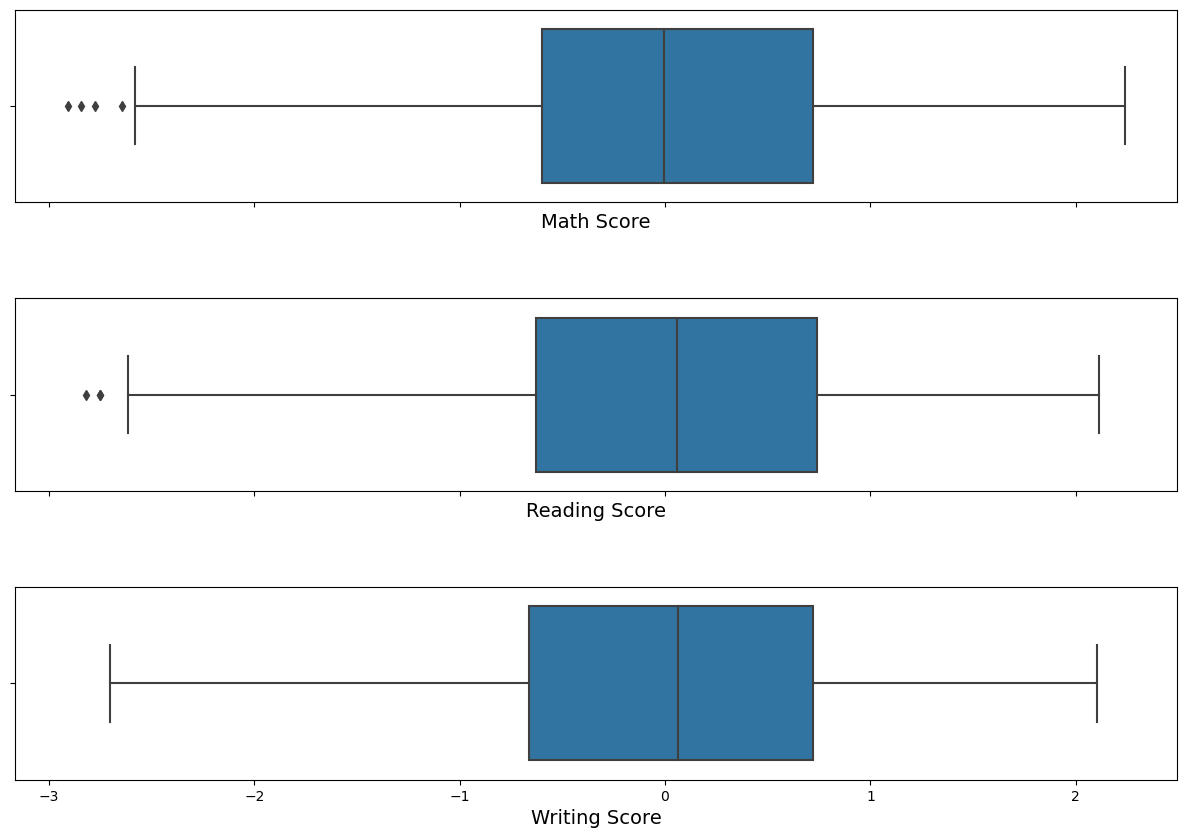

In [182]:
# Tạo subplots với 3 dòng và 1 cột
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10), sharex=True, gridspec_kw={'hspace': 0.5})

# Vẽ boxplot cho từng cột và đặt tên cho mỗi biểu đồ
sns.boxplot(x=df["math score"], ax=axes[0])
axes[0].set_xlabel("Math Score", fontsize=14)  

sns.boxplot(x=df["reading score"], ax=axes[1])
axes[1].set_xlabel("Reading Score", fontsize=14)  

sns.boxplot(x=df["writing score"], ax=axes[2])
axes[2].set_xlabel("Writing Score", fontsize=14)  


plt.show()


# Dữ liệu cuối cùng sau tiền xử lí

In [183]:
df

,math score,reading score,writing score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_free/reduced,test preparation course_completed
0,0.390024,0.193999,0.391492,1,0,1,0,0,0,1,0,0,0,0,0
1,0.192076,1.427476,1.313269,1,0,0,1,0,0,0,0,0,1,0,1
2,1.577711,1.770109,1.642475,1,0,1,0,0,0,0,0,1,0,0,0
3,-1.259543,-0.833899,-1.583744,0,1,0,0,0,1,0,0,0,0,1,0
4,0.653954,0.605158,0.457333,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1,0,0,0,0,0,0,0,1,0,0,1
996,-0.269803,-0.970952,-0.859491,0,0,0,1,0,0,0,1,0,0,1,0
997,-0.467751,0.125472,-0.201079,1,0,0,1,0,0,0,1,0,0,1,1
998,0.126093,0.605158,0.589015,1,0,0,0,1,0,0,0,0,1,0,1


# Xuất dữ liệu về file excel

In [184]:
# df.to_excel("C:/Users/ADMIN/Downloads/Data/NewStudentsPerformance.xlsx")